# Web Scraping, Regular Expressions, and File Parsers #

There are three main techniques to parse data from the internet with automated/semi-automated tools: 1) Regular Expressions, 2) File Parsers, and 3) APIs. Of these three methods, using an API is probably the best but there are situations where an API does not exist or is not available. File Parsers are powerful tools but they can be complicated and time consuming. Regular Expressions are often the quickest and most generic solution, but are prone to unexpected faults. We will consider Regular Expressions in this notebook.

## Regular Expressions ##

Regular Expressions (RegEx) are a tool for pattern matching, text extraction, and text substitution. They can be applied to any ASCII/UTF-8 text. Non-English characters can be handled with hex codes but it gets messy really quickly. Most languages support RegEx although there are slight differnces between them.

Regular Expressions are usually faster than File Parsers.

## File Parsers ##

File Parsers are modules that understand and can break apart files of a specific format. They are generally considered the best way to generically extract information from a structured file. In regard to web scraping, HTML and XML parsers are the most common. The problem with HTML parsers is that there are occasionally websites that contain invalid HTML and cannot be parsed correctly.

File Parsers are usually more robust than Regular Expressions.

## References ##

* [Ethics in Web Scraping](https://towardsdatascience.com/ethics-in-web-scraping-b96b18136f01)
* [The Facebook and Cambridge Analytica scandal, explained with a simple diagram](https://www.vox.com/policy-and-politics/2018/3/23/17151916/facebook-cambridge-analytica-trump-diagram)
* [A Gentle Introduction to Regular Expressions with Python](https://towardsdatascience.com/a-gentle-introduction-to-regular-expressions-with-python-4f3fce46dcb4)
* [RegEx101 - a playground for Regular Expressions](https://regex101.com/)
* [Regular Expressions vs Parsers: A humorous StackOverflow debate](https://stackoverflow.com/questions/1732348/regex-match-open-tags-except-xhtml-self-contained-tags)
* [Runaway Regular Expressions: Catastrophic Backtracking](https://www.regular-expressions.info/catastrophic.html)
* [Web Scraping Ptyon Using Beautiful Soup](https://www.dataquest.io/blog/web-scraping-python-using-beautiful-soup/)
* [Extracting Selected Columns from a Table Using Beautiful Soup](https://stackoverflow.com/questions/13074586/extracting-selected-columns-from-a-table-using-beautifulsoup)


In [1]:
from urllib import request
from bs4 import BeautifulSoup
import re

## Web Scraping ##

Web scraping is process of using a program to download and parse data from the internet. Web scraping is simply writing a program or script to retrieve a URL and then parsing the HTML that comes back. Humans "scrape" data from the internet every time they go to a web page. The difference is whether a human or program is parsing the information.

There are some people who are opposed to the practice because it has been abused in the past. But these people often don't understand what web scraping actually entails and how often they use it without realizing it. Google Search works by web scraping. Some of the websites that you use to view aggregated information from many sources use web scraping to obtain the data.

Most web scraping abuses are considered unethical, not because of any technique that is unique to web scraping, but due to general practices that would be considered unethical (or even illegal) no matter how the data was obtained. For instance: scraping private, personal information is unethical because you are accessing unauthorized information. Another example is plagarism, especially when the source information is copywrited.

Really, the only ethical issue that I can think of that is specific to web scraping is related to accessibility. Web scrapers can operate so quickly that they can overwhelm smaller servers and prevent other users from accessing a website. You can potentially cause a Denial of Service with a web scraper (although your home computer is unlikely to be fast enough to do this). A more realistic example of this might be the cryptominers who have scripts that buy up all the video cards before you can purchase one for your gaming system.

For more information, please read the [Ethics in Web Scraping](https://towardsdatascience.com/ethics-in-web-scraping-b96b18136f01) article by James Densmore.

In [2]:
url = 'https://cuieagles.com/sports/mens-lacrosse/schedule'
response = request.urlopen(url)
contents = response.read().decode('UTF-8')

print(contents)



            <!doctype html>
            <html id="ctl00_html" lang="en" class=" wide schedules-page sidearm-schedule-template-default wide sport mlax">

            <head><script>window.client_hostname = "cuieagles.com";window.client_title = "Concordia University Irvine";window.server_name = "1018899-APP73";window.client_division = "DII";window.targetting_criteria = {"page_template":"schedule-list","sport_name":"mlax","sport_name_custom":"mlax","site":"cui","cbs_site_code":"coca","content_id":null,"sect":"mlacros"};window.client_shortname = "cui";window.dfp_network_code = "21708449227";window.img_dfp_unit_name = "";window.ad_full_unit_name = "SAExtended/concordiairvine";window.block_dfp = false;window.reactions = null;window.cbs_ads_activated = true;window.site_colors = {"safe_text_white":"#0f4d2a","safe_text_black":"#ffffff","primary_background":"#0f4d2a","primary_text":"#ffce00","secondary_background":"#ffce00","secondary_text":"#0f4d2a"};window.inactive_tab_title = "";window.site_

In [3]:
pattern = "(?P<PROTOCOL>https?):\/\/(?P<URL>[^\/\"]+)(?P<RESOURCE>\/[^\"']+)\""

results = re.findall(pattern, contents)
for link in results:
    print(link)

('https', 'dbukjj6eu5tsf.cloudfront.net', '/assets.sidearmsports.com/responsive/js/main.1648563990634.js')
('https', 'fonts.sidearmsports.com', '/sidearm_v2/2021-08-16-883562/sidearm_font_v2.css')
('https', 'fonts.sidearmsports.com', '/sidearm/2020-05-12-535576/sidearm_font.css')
('https', 'cdnjs.cloudflare.com', '/ajax/libs/jquery/1.9.1/jquery.min.js')
('https', 'cdnjs.cloudflare.com', '/ajax/libs/require.js/2.2.0/require.min.js')
('https', 'dbukjj6eu5tsf.cloudfront.net', '/assets.sidearmsports.com/responsive/js/bundle.1623185959941.js')
('https', 'cdnjs.cloudflare.com', '/ajax/libs/slick-carousel/1.5.9/slick.min.css')
('https', 'fonts.sidearmsports.com', '/sidearm/2020-05-12-535576/sidearm_font.css')
('https', 'fonts.sidearmsports.com', '/sidearm_v2/2021-08-16-883562/sidearm_font_v2.css')
('https', 'cuieagles.com', '/images/2021/3/18/CUI_Square.jpg')
('https', 'fonts.googleapis.com', '/css2?family=Mulish:wght@400;700;900&display=swap')
('https', 'cuieagles.com', '/images/logos/site/s

## Dynamic Content ##

Many websites use dynamic content to provide more interesting and useful information. The dynamic content is not contained in the original HTML but instead is retrieved when the page is loaded--bummer! If you are gathering data for a machine learning project, it is likely that you will encounter dynamic data.

In [4]:
# First, find the data through your web browser
# 'https://www.wunderground.com/history/monthly/us/ca/orange/date/2021-2'

# Attempt to download weather data for our machine learning model

url = 'https://www.wunderground.com/history/monthly/us/ca/orange/date/2021-2'
response = request.urlopen(url)
content = response.read().decode('UTF-8')

print(contents[:500])



            <!doctype html>
            <html id="ctl00_html" lang="en" class=" wide schedules-page sidearm-schedule-template-default wide sport mlax">

            <head><script>window.client_hostname = "cuieagles.com";window.client_title = "Concordia University Irvine";window.server_name = "1018899-APP73";window.client_division = "DII";window.targetting_criteria = {"page_template":"schedule-list","sport_name":"mlax","sport_name_custom":"mlax","site":"cui","cbs_site_code":"coca","content


In [5]:
# The good data is somewhere around "Daily Observations"

if "Daily Observations" in content:
    index = content.index("Daily Observations")
    print(content[index-100:index+2000])

315="" _nghost-sc236=""><div _ngcontent-sc236=""><div _ngcontent-sc236="" class="observation-title">Daily Observations</div> No Data Recorded <!----><!----></div></lib-city-history-observation></div></div><div _ngcontent-sc315="" class="row is-sidebar ng-star-inserted"><div _ngcontent-sc315="" class="region-sidebar"><ad-wx-bot-300 _ngcontent-sc315="" libsticky=""><div id="wx-bot-300-browser" class="ad-wrap ad-desktop"><div id="WX_Bot300"></div></div></ad-wx-bot-300></div></div><!----></div></div><div _ngcontent-sc315="" class="region-footer ng-star-inserted"><ad-taboola _ngcontent-sc315="" type="history" _nghost-sc123=""><div _ngcontent-sc123="" class="ad-taboola"><div _ngcontent-sc123="" class="row"><!----><!----><!----><!----><div _ngcontent-sc123="" id="taboola-history-thumbnails" class="taboola-container ng-star-inserted"></div><!----><!----><!----><!----></div></div></ad-taboola><ad-triple-box _ngcontent-sc315="" _nghost-sc111=""><div _ngcontent-sc111="" class="row show-for-medium

### No Dynamic Data! ###

Argh--The weather statistics are nowhere to be found! There are two solutions: use a browser to download the data manually or write a program that will download the dynamic data. One is easier and the other might be faster.

Here are some articles on downloading the dynamic data yourself. We are not going to do this during class.
* [Stackoverflow #1](https://stackoverflow.com/questions/14516590/how-to-save-complete-webpage-not-just-basic-html-using-python)
* [Stackoverflow #2](https://stackoverflow.com/questions/13854274/is-it-possible-to-get-complete-source-code-of-a-website-including-css-by-just-pr/13855315#13855315)

If you are just going to need a few pages, it's probably faster to use your web browser to manually browser and then save the completed webpage

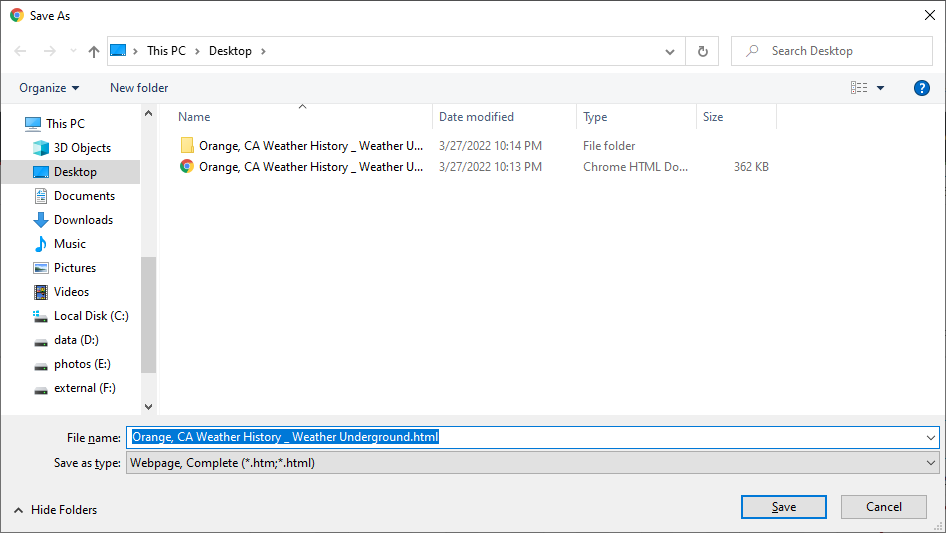

In [6]:
filename = 'Orange, CA Weather History _ Weather Underground.htm'
with open(filename, 'r') as fin:
    contents = fin.read() 
print(contents[:1000])

FileNotFoundError: [Errno 2] No such file or directory: 'Orange, CA Weather History _ Weather Underground.htm'

In [ ]:
# TAKE A UNIQUE VALUE THAT WE KNOW

index = contents.index("56.6")
print(contents[index-200:index+200])

In [ ]:
# WHERE IS THE DATA WE WANT AND HOW DO WE ROBUSTLY EXTRACT IT?

pattern = "<td _ngcontent-app-root-c202=\"\" class=\"ng-star-inserted\"> (?P<value>[\d\.]+) <\/td>"

result = re.findall(pattern, contents)
print(result)

In [ ]:
# HOW MANY DAYS ARE IN THIS MONTH?

print(len(result) / 28)
print(len(result) / 29)
print(len(result) / 30)
print(len(result) / 31)

In [ ]:
import numpy as np
import pandas as pd
import re

filename = 'Orange, CA Weather History _ Weather Underground.htm'
with open(filename, 'r') as fin:
    contents = fin.read() 

pattern = "<td _ngcontent-app-root-c202=\"\" class=\"ng-star-inserted\"> (?P<value>[\d\.]+) <\/td>"
result = re.findall(pattern, contents)

# It's easier to just manually add the headings because the table uses merged columns to display properly
headings = ['Day', 'Temp Max', 'Temp Avg', 'Temp Min', 'Dew Point Max', 'Dew Point Avg', 'Dew Point Min',
            'Humidity Max', 'Humidity Avg', 'Humidity Min', 'Wind Speed Max', 'Wind Speed Avg', 'Wind Speed Min',
            'Pressure Max', 'Pressure Avg', 'Pressure Min', 'Precipitation (in)']

month_lengths = [28, 29, 30, 31]
for total_days in month_lengths:
    if len(result) / total_days == len(result) // total_days:
        print(f"This month is {total_days} days long")
        data = np.array(result)
        data = np.reshape(data, (17, total_days))
        data = pd.DataFrame(data.T, columns=headings).set_index('Day')
        break

data

## HTML Parsers - Beautiful Soup ##

There are a handful of python modules built to parse HTML data. One of the most commonly used is called Beautiful Soup. It will heirarchically break up a webpage by its tags and store them in a tree that you can search and enumerate. You can find some good tutorials online. Here is a quick example with the same weather data.

In [ ]:
# ONE OF THE REFERENCES PROVIDED A TUTORIAL THAT I AM PARTLY REPRODUCING HERE

page = requests.get("https://dataquestio.github.io/web-scraping-pages/simple.html")
page.status_code

In [ ]:
page.content

In [ ]:
# WALKING THROUGH THE HTML HEIRARCHY

soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

In [ ]:
children = list(soup.children)
print(len(children))
children

In [ ]:
print('-----------------------------------------')
for child in soup.children:
    print(f"'{child}'")
    print('-----------------------------------------')

In [ ]:
[type(item) for item in list(soup.children)]

In [ ]:
html = list(soup.children)[2]

In [ ]:
list(html.children)

In [ ]:
body = list(html.children)[3]

In [ ]:
list(body.children)

In [ ]:
p = list(body.children)[1]
print(p)
print(p.get_text())

In [ ]:
# START OVER AGAIN AT THE TOP AND JUST SEARCH FOR TAGS

soup = BeautifulSoup(page.content, 'html.parser')
soup.find_all('p')

In [ ]:
results = soup.find_all('p')
for p in results:
    print(p.get_text())

In [ ]:
# EXTRACTING FROM A TABLE

filename = 'Orange, CA Weather History _ Weather Underground.htm'
with open(filename, 'r') as fin:
    contents = fin.read()

soup = BeautifulSoup(contents, 'html.parser')

print('-----------------------------------------')
for table in soup.findAll('table'):
    print(table.get_text())
    print('-----------------------------------------')

In [ ]:
for row in soup.findAll('table')[1].tbody.findAll('tr'):
    for col in row.findAll('td'):
        print(col.contents)

In [ ]:
days = soup.select('table[aria-labelledby="Days data"]')

for row in days[2].find_all('tr'):
    for col in row.find_all('td'):
        print(col.contents)
    print()

In [ ]:
for d in days:
    for row in d.find_all('tr'):
        cols = [c.contents[0].strip() for c in row.find_all('td')]
        print(cols)
    print()

In [ ]:
data = []
for d in days:
    for row in d.find_all('tr'):
        for col in row.find_all('td'):
            value = col.contents[0].strip()
            try:
                data.append(float(value))
            except:
                continue

headings = ['Day', 'Temp Max', 'Temp Avg', 'Temp Min', 'Dew Point Max', 'Dew Point Avg', 'Dew Point Min',
            'Humidity Max', 'Humidity Avg', 'Humidity Min', 'Wind Speed Max', 'Wind Speed Avg', 'Wind Speed Min',
            'Pressure Max', 'Pressure Avg', 'Pressure Min', 'Precipitation (in)']

month_lengths = [28, 29, 30, 31]
for total_days in month_lengths:
    
    if len(result) / total_days == len(result) // total_days:
        print(f"This month is {total_days} days long")
        data = np.array(result)
        data = np.reshape(data, (17, total_days))
        data = pd.DataFrame(data.T, columns=headings).set_index('Day')
        break
        
data